In [17]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

In [18]:
# Beolvassuk a képeket
chessboards = glob.glob('*.png')

In [19]:
# Hány sarokpontot akarunk megtalálni
chessboardSize = (24,17)

# Képek felbontása
frameSize = (1440,1080) 

In [20]:
# Beállítjuk a feltételeket, hogy meddig fusson a programunk
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [21]:
# Object pointok inicializálása
ops = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
ops[:,:2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1,2)


In [22]:
# Világ és vizsgált-kép koordinátákat tartalmazó listák létrehozása
objPoints = []
imgPoints = []

Image__2018-10-05__10-29-04.png


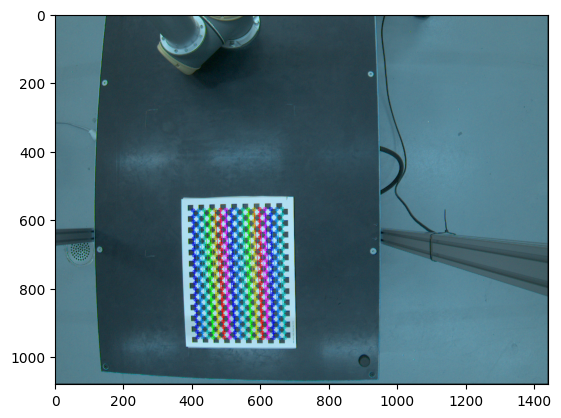

Image__2018-10-05__10-29-50.png


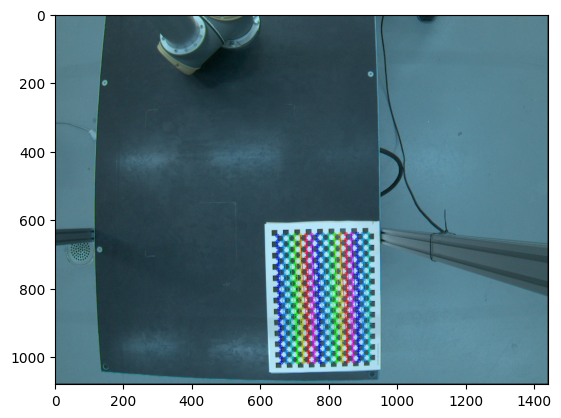

Image__2018-10-05__10-30-08.png


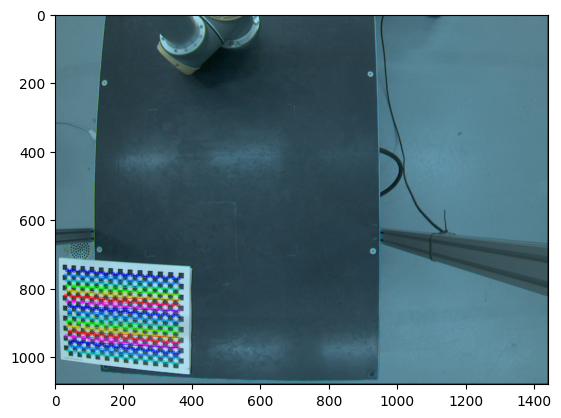

Image__2018-10-05__10-30-20.png


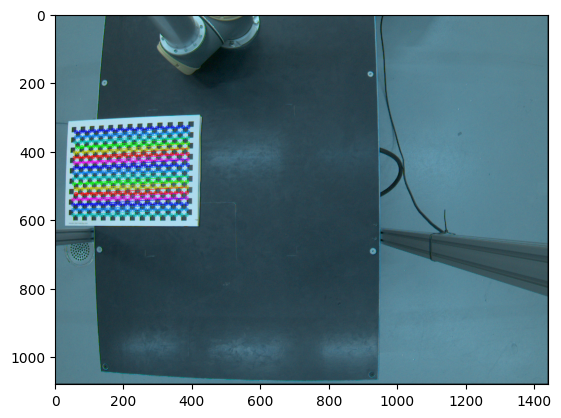

Image__2018-10-05__10-30-37.png


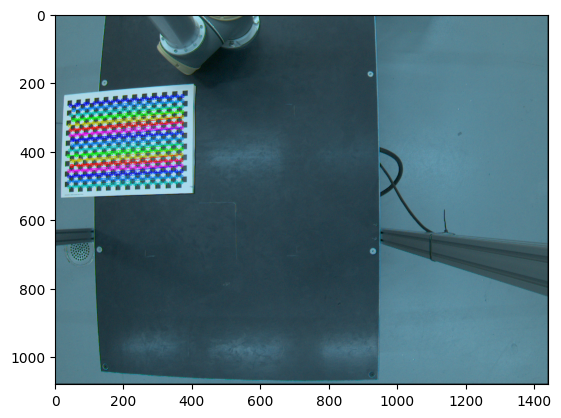

Image__2018-10-05__10-30-50.png


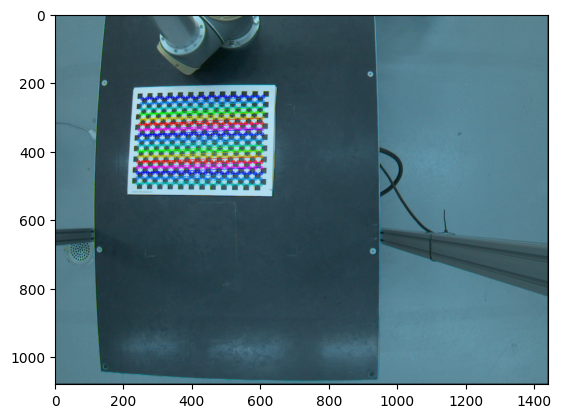

Image__2018-10-05__10-31-05.png


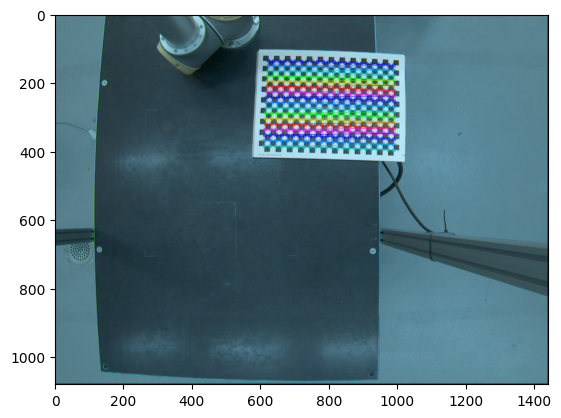

Image__2018-10-05__10-31-47.png


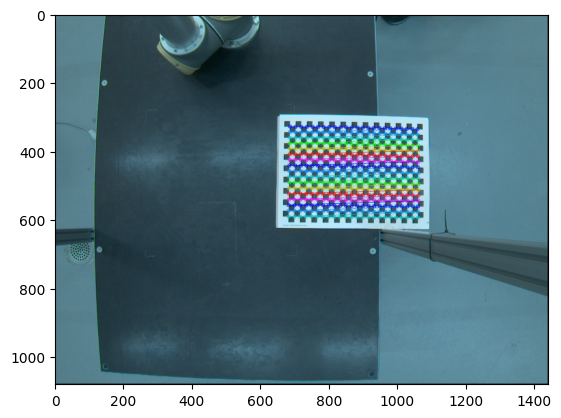

Image__2018-10-05__10-31-59.png


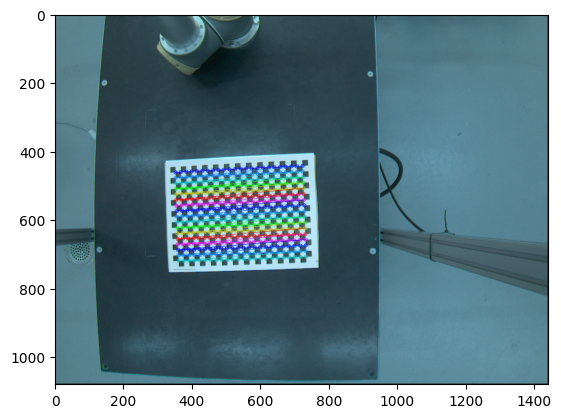

Image__2018-10-05__10-32-18.png


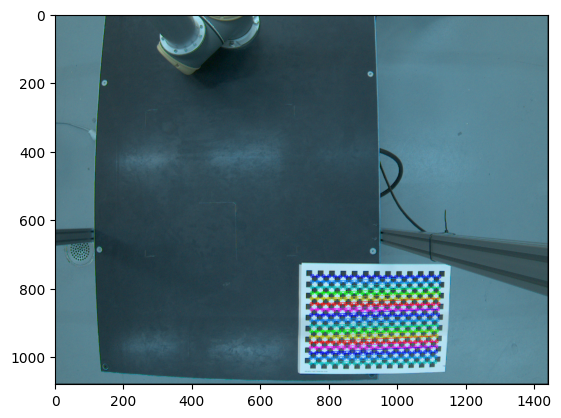

Image__2018-10-05__10-32-40.png


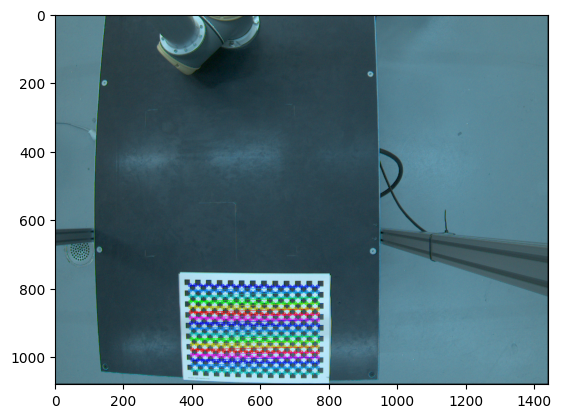

In [23]:
# Végig iterálunk az összes beolvasott képen
for image in chessboards:
    img = cv.imread(image)
    print(image)
    # Átkonvertáljuk a képeket szürkeárnyalatossá, mert a fv-ek csak ezzel tudnak jól dolgozni
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Az OpenCV findChessboardCorners fv-el megkeressük a táblánk sarkapontjait
    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)
    
    # Hogyha találtunk sarokpontot, akkor azt hozzáadjuk a korábban létrehozott világ ill. kép koordinákat tartalmazó listánkhoz
    if ret == True:
        objPoints.append(ops)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgPoints.append(corners)
        
        # Megrajzoljuk a felismert sarokpontokat, majd megjelenítük őket a beolvasott képeinken
        cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
        plt.imshow(img)
        plt.show()


In [24]:
# Kalibráljuk a kameránkat, azaz meghatározzuk a kamera "mátrixát"
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objPoints, imgPoints, frameSize, None, None)

In [25]:
# Kamera kalibrálás "sikeressége"
print(ret)

0.7756168205621444


In [26]:
print("Kamera mátrixa:\n", mtx)

Kamera mátrixa:
 [[1.24350423e+03 0.00000000e+00 7.68827309e+02]
 [0.00000000e+00 1.24362558e+03 5.95353648e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [27]:
print("Kamera torzítása:\n", dist)

Kamera torzítása:
 [[-0.28520167  0.20891128 -0.00144096 -0.00626931 -0.14276984]]


In [28]:
print("Forgatás vektorai:\n", rvecs)

Forgatás vektorai:
 (array([[-1.92535400e-02],
       [-1.12453257e-03],
       [-1.58825588e+00]]), array([[-0.02612218],
       [-0.00564692],
       [-1.59388948]]), array([[-0.01967856],
       [ 0.01027658],
       [ 0.0346918 ]]), array([[-1.60308253e-02],
       [ 1.13630790e-02],
       [ 9.01027488e-06]]), array([[-0.01423422],
       [ 0.01055573],
       [-0.02059983]]), array([[-0.01787081],
       [ 0.00704228],
       [ 0.02019623]]), array([[-0.0130692 ],
       [ 0.01068268],
       [ 0.02897435]]), array([[-0.01576324],
       [ 0.00981871],
       [ 0.01022172]]), array([[-0.02048135],
       [ 0.00129108],
       [-0.04141125]]), array([[-0.01821015],
       [ 0.0065938 ],
       [ 0.01619321]]), array([[-0.01859403],
       [ 0.00269359],
       [-0.00117968]]))


In [29]:
print("Eltolás vektorai:\n", tvecs)

Eltolás vektorai:
 (array([[-21.92973926],
       [ 21.63755872],
       [ 74.31181079]]), array([[-6.64522056],
       [26.08049411],
       [74.25651599]]), array([[-48.12484895],
       [ 10.05234709],
       [ 74.65460641]]), array([[-46.52355899],
       [-16.52945614],
       [ 74.96596961]]), array([[-47.87008183],
       [-21.94338836],
       [ 75.00435227]]), array([[-32.83877534],
       [-22.32989204],
       [ 74.92972178]]), array([[ -9.03451531],
       [-28.75503882],
       [ 74.93303265]]), array([[ -5.02026565],
       [-16.27864603],
       [ 74.87304873]]), array([[-25.74794409],
       [ -8.24779112],
       [ 74.76449823]]), array([[-1.09170922],
       [10.18942271],
       [74.4941045 ]]), array([[-23.06112106],
       [ 12.07002717],
       [ 74.47933464]]))
